### About the data
Books about US politics
Compiled by Valdis Krebs

Nodes represent books about US politics sold by the online bookseller
Amazon.com.  Edges represent frequent co-purchasing of books by the same
buyers, as indicated by the "customers who bought this book also bought
these other books" feature on Amazon.

Nodes have been given values "l", "n", or "c" to indicate whether they are
"liberal", "neutral", or "conservative".  These alignments were assigned
separately by Mark Newman based on a reading of the descriptions and
reviews of the books posted on Amazon.

These data should be cited as V. Krebs, unpublished,
http://www.orgnet.com/.


I took it from here: https://public.websites.umich.edu/~mejn/netdata/

In [142]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
import igraph as ig
import matplotlib as mpl

G=nx.read_gml('data/polbooks.gml')

In [143]:
# print all nodes and their attributes
for n in G.nodes(data=True):
    print(n)

('1000 Years for Revenge', {'value': 'n'})
('Bush vs. the Beltway', {'value': 'c'})
("Charlie Wilson's War", {'value': 'c'})
('Losing Bin Laden', {'value': 'c'})
('Sleeping With the Devil', {'value': 'n'})
('The Man Who Warned America', {'value': 'c'})
('Why America Slept', {'value': 'n'})
('Ghost Wars', {'value': 'n'})
('A National Party No More', {'value': 'c'})
('Bush Country', {'value': 'c'})
('Dereliction of Duty', {'value': 'c'})
('Legacy', {'value': 'c'})
('Off with Their Heads', {'value': 'c'})
('Persecution', {'value': 'c'})
("Rumsfeld's War", {'value': 'c'})
('Breakdown', {'value': 'c'})
('Betrayal', {'value': 'c'})
('Shut Up and Sing', {'value': 'c'})
('Meant To Be', {'value': 'n'})
('The Right Man', {'value': 'c'})
('Ten Minutes from Normal', {'value': 'c'})
("Hillary's Scheme", {'value': 'c'})
('The French Betrayal of America', {'value': 'c'})
('Tales from the Left Coast', {'value': 'c'})
('Hating America', {'value': 'c'})
('The Third Terrorist', {'value': 'c'})
('Endgame'

In [144]:
# print all edges and their attributes
for e in G.edges(data=True):
    print(e)

('1000 Years for Revenge', 'Bush vs. the Beltway', {})
('1000 Years for Revenge', "Charlie Wilson's War", {})
('1000 Years for Revenge', 'Losing Bin Laden', {})
('1000 Years for Revenge', 'Sleeping With the Devil', {})
('1000 Years for Revenge', 'The Man Who Warned America', {})
('1000 Years for Revenge', 'Why America Slept', {})
('Bush vs. the Beltway', 'Losing Bin Laden', {})
('Bush vs. the Beltway', 'The Man Who Warned America', {})
('Bush vs. the Beltway', 'Why America Slept', {})
("Charlie Wilson's War", 'Sleeping With the Devil', {})
("Charlie Wilson's War", 'The Man Who Warned America', {})
("Charlie Wilson's War", 'Ghost Wars', {})
('Losing Bin Laden', 'The Man Who Warned America', {})
('Losing Bin Laden', 'A National Party No More', {})
('Losing Bin Laden', 'Bush Country', {})
('Losing Bin Laden', 'Dereliction of Duty', {})
('Losing Bin Laden', 'Legacy', {})
('Losing Bin Laden', 'Off with Their Heads', {})
('Losing Bin Laden', 'Persecution', {})
('Losing Bin Laden', "Rumsfeld'

In [145]:
# set positions for each node
pos = nx.spring_layout(G, seed=222)

In [146]:
# I want to give weights to the edges based on beetween which nodes they are
for e in G.edges(data=True):
    # if the edge is between two nodes with the same political alignment, the weight is 0.1
    if G.nodes[e[0]]['value'] == G.nodes[e[1]]['value']:
        e[2]['weight'] = 0.1
    # if the edge is between two nodes with different political alignment, the weight is 1
    else:
        e[2]['weight'] = 1

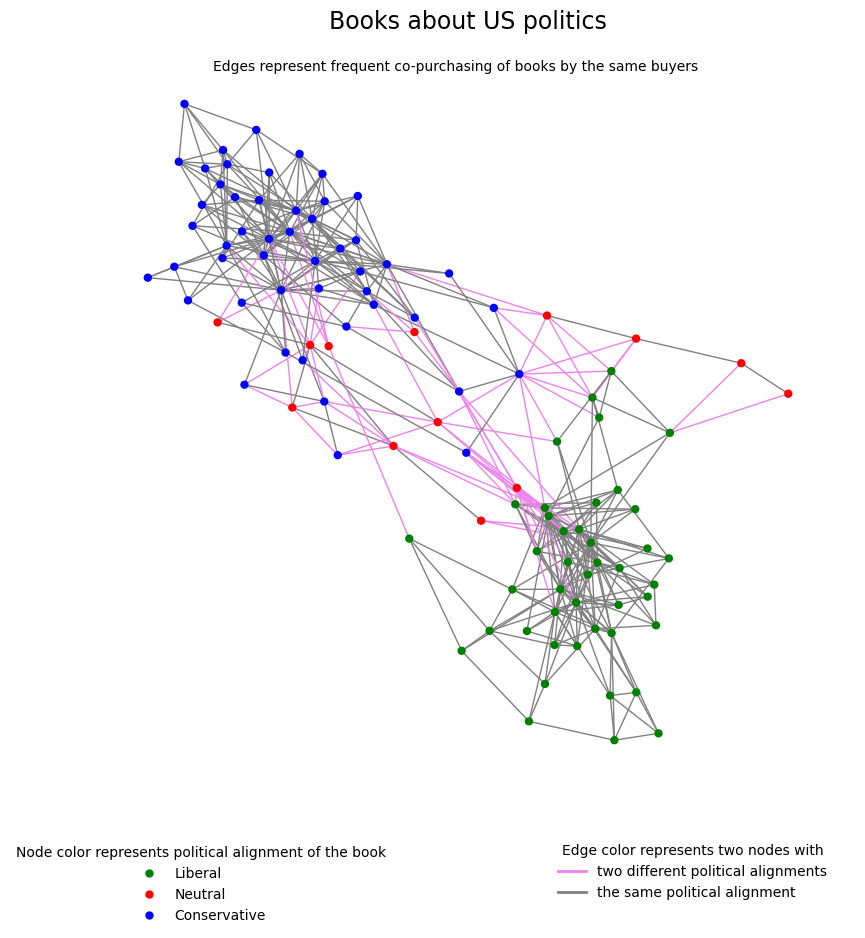

In [147]:
fig, ax = plt.subplots(1, 1, figsize=(10, 10))
ax.set_title("Books about US politics", fontsize=17)

nx.draw(
    G,
    pos,
    with_labels=False,
    # depending on the node attribute "value" ("l","n","c"), nodes will be colored accordingly (yellow, red, blue)
    #n[1]['value'].replace('l', 'yellow').replace('n', 'red').replace('c', 'blue')
    node_color=["green" if n[1]['value']=="l" else "red" if n[1]['value']=="n" else "blue"  for n in G.nodes(data=True)],
    node_size=25,
    node_shape='o',
    #[e[2]['weight'] for e in G.edges(data=True)]
    # depending on the edge attribute "weight", edges will be colored accordingly (grey, violet)
    
    edge_color=["violet" if e[2]['weight']==1 else "grey" for e in G.edges(data=True)],
    ax=ax
)


first_legend=ax.legend(
    handles=[mpl.lines.Line2D([], [], color=e, linewidth=2) for e in ["violet","grey"]],
    labels=list(n for n in ["two different political alignments","the same political alignment"]),
    loc = "center left",
    bbox_to_anchor=(0.6, -0.084),
    frameon=False,
    title="Edge color represents two nodes with",
)
ax.add_artist(first_legend)


# creating a legend according to the node color
ax.legend(
    handles=[mpl.lines.Line2D([], [], color=e, marker='o', markersize=5,linestyle="None") for e in ["green","red","blue"]],
    labels=list(n for n in ["Liberal","Neutral","Conservative"]),
    loc = "center left",
    bbox_to_anchor=(-0.1, -0.1),
    frameon=False,
    title="Node color represents political alignment of the book",
)
ax.text(0.5,0.85,"Edges represent frequent co-purchasing of books by the same buyers", ha="center", va="center", transform=fig.transFigure, fontsize=10)
plt.axis('off')
plt.show()

## Summary
- People tend to buy books with similar political alignment
- Some neutral books are often bought mostly by one political alignment
- Some books are bought by all political alignments
- Readers of popular sources from a particular political option are more likely to explore sources from other political options, whereas readers of less popular books tend to be closed off to other works.